# Leukemia Remission prediction using Logistic Regression

### Importing Relevant Libraries

In [1]:
import os
from collections import Counter
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the dataset and exploring the dataset

In [2]:
data = pd.read_excel("leukemia_remission.xlsx")

In [3]:
data.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [4]:
print (type(data))

<class 'pandas.core.frame.DataFrame'>


### Separating the REMISS column from the data

In [9]:
Y = data['REMISS']
X= data.drop("REMISS", axis=1)
print(X.head())

   CELL  SMEAR  INFIL   LI  BLAST  TEMP
0   0.8   0.83   0.66  1.9   1.10  1.00
1   0.9   0.36   0.32  1.4   0.74  0.99
2   0.8   0.88   0.70  0.8   0.18  0.98
3   1.0   0.87   0.87  0.7   1.05  0.99
4   0.9   0.75   0.68  1.3   0.52  0.98


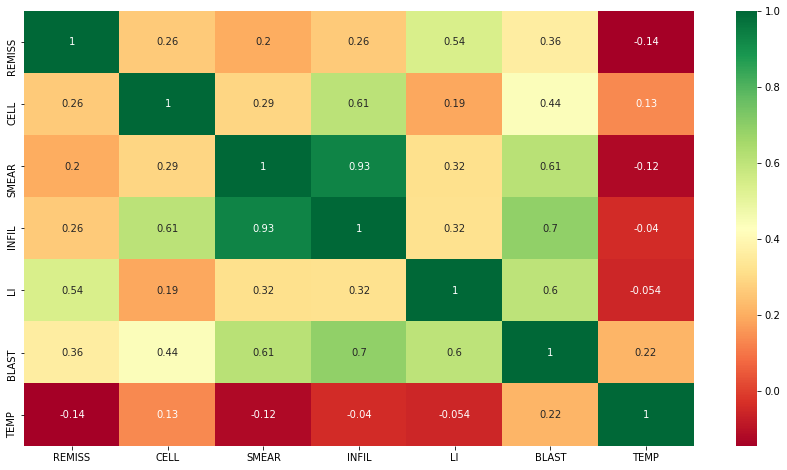

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

### Visualising the dataset 

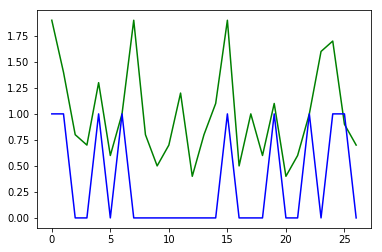

In [11]:
plt.plot(X['LI'],'g')
plt.plot(Y, 'b')

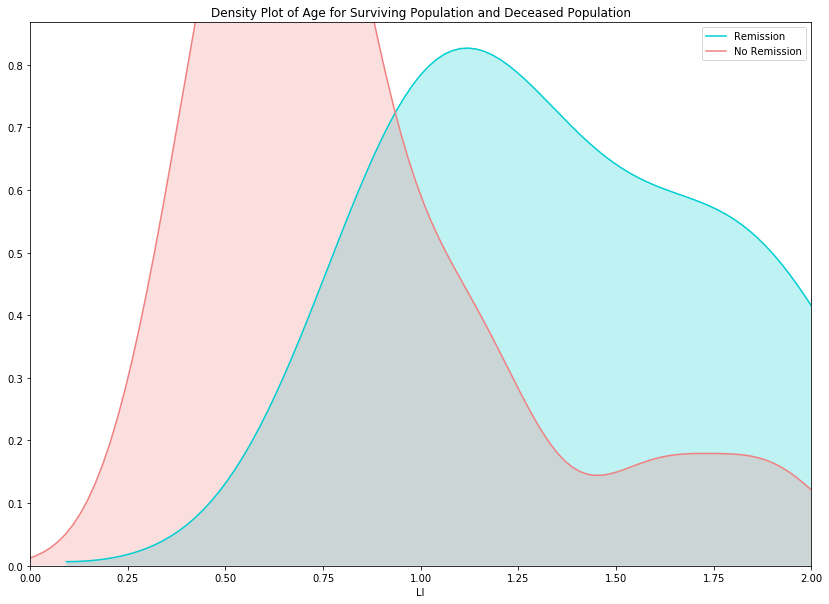

In [12]:
plt.figure(figsize=(14,10))
ax = sns.kdeplot(data["LI"][data.REMISS == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["LI"][data.REMISS == 0], color="lightcoral", shade=True)
plt.legend(['Remission', 'No Remission'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='LI')
plt.xlim(0,2)
plt.show()

### Training the logistic regression model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], 
                                                    np.array(data['REMISS']), 
                                                    test_size=0.25, random_state=0)

lg = LogisticRegression(solver='liblinear', max_iter=1000)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

### Displaying Training and Validation Accuracy

In [16]:
tr_acc = accuracy_score(lg.predict(X_train), y_train)
te_acc = accuracy_score(y_pred, y_test)

print('Train Accuracy: \t{:.3f} %\nValidation Accuracy: \t{:.3f} %'.format(tr_acc*100, te_acc*100))

Train Accuracy: 	80.000 %
Validation Accuracy: 	57.143 %


### Displaying the Logistic Regression Coeffecients

In [17]:
print(lg.coef_)

[[-0.11051086 -0.0805738   0.12358506  0.90967991  0.43045691 -0.70593975]]


### Confusion Matrix

Text(0.5,257.44,'Predicted label')

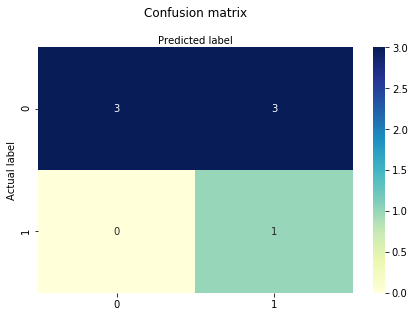

In [18]:
conf_mat = confusion_matrix(y_test,y_pred)
class_names=["Not Remiss","Remiss"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Accuracy, Precision, Recall

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5714285714285714
Precision: 0.25
Recall: 1.0


NameError: name 'slope1' is not defined

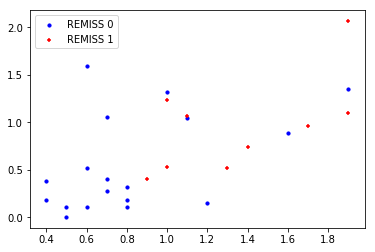

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data.LI[data.REMISS==0],data.BLAST[data.REMISS==0], s=10, c='b', marker="o", label='REMISS 0')
ax1.scatter(data.LI[data.REMISS==1],data.BLAST[data.REMISS==1], s=10, c='r', marker="+", label='REMISS 1')
plt.legend(loc='upper left');

intercept1=-0.65575616
x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1])
ax1.set_xlim([0,2])
ax1.set_ylim([0,2])
plt.show()

### HeatMap
Heat map will show us the features that are positively and negatively correlated with the REMISS target column

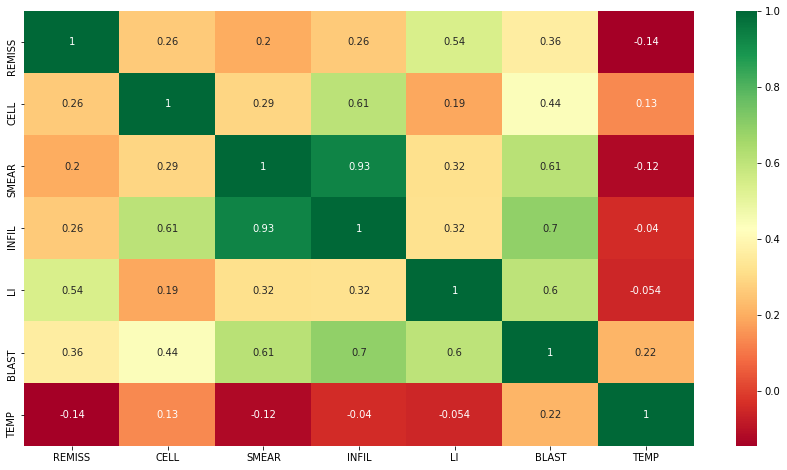

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

We observe that - All features except the TEMP feature is positively correlated with REMISS

### Computing Probability 
We have cellularity is 0.3, smear is 0.28, absolute number of blasts in the peripheral blood is 0.21, percentage labeling index of the bone marrow leukemia cells is 0.9, percentage of absolute marrow leukemia cell infiltrate is 0.09, and the highest temperature prior to start of treatment 1.01

In [26]:
Test_X=[[0.3,0.28,0.21,0.9,0.09,1.01]]
print(lg.predict(Test_X))

[0]


The logisitc regression predicts the REMISS class label to be = 0.
This implies that Leukemia Remission has not occurred.

In [27]:
print(lg.predict_proba(Test_X))

[[0.63205974 0.36794026]]


The probability with which the logistic regression predicts REMISS=0 is 63.2 %